In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)

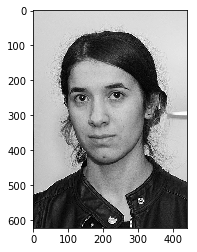

In [2]:
plt.imshow(nadia,cmap='gray')

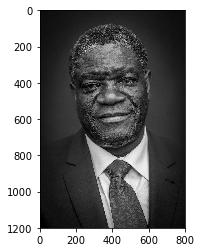

In [3]:
plt.imshow(denis,cmap='gray')

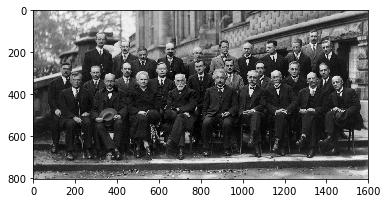

In [4]:
plt.imshow(solvay,cmap='gray')

In [5]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [25]:
def detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,255,0),10)
        
    return face_img


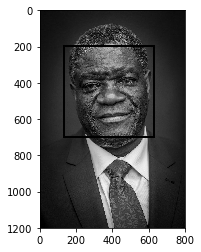

In [26]:
result = detect_face(denis)
plt.imshow(result,cmap='gray')

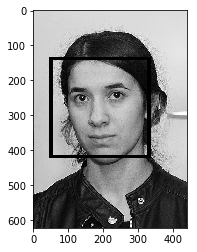

In [27]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

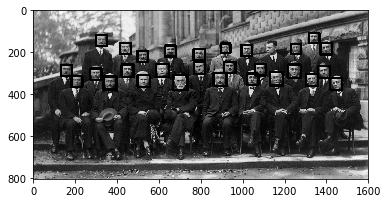

In [28]:
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [29]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [30]:
def detect_eyes(img):
    face_img = img.copy()
    
    eyes_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

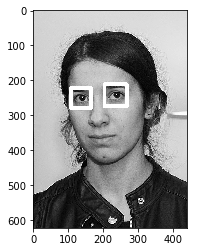

In [31]:
result = detect_eyes(nadia)

plt.imshow(result,cmap='gray')

In [32]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detect',frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()